In [1]:
import scipy.constants as const
from numpy import exp
import matplotlib.pyplot as plt

The energetic width of the band gap $E_g \thinspace$ determines the concentration of electrons in the conduction band and of holes in the valence band.<br><br>
At a given temperature, the number of electrons and holes in the respective bands is equal.  This is known as the "Mass Action Law", and may be stated (symbolically) as $$n=p=n_i$$<br>

# Diodes

All diodes obey an exponential behavior law:

$$\chi={\frac{V_D}{n \cdot V_T}}$$<br>
$$I_F=I_S\left ( e^\chi -1 \right  )$$<br>
<br>
$$V_T=\frac{kT}{q}$$

Note that $n \thinspace$ is what is known as the "ideality coefficient" or "ideality factor" ... when $n=2$, recombination current dominates, and when $n=1$ diffusion current dominates.  When both currents are comparable $n$ has a value between $1$ and $2$

In [2]:
Temp=300.0
VT=(const.k*Temp)/(const.e)
print(VT)

0.025851991011651636


In [3]:
min=0.0
max=0.7
step=1.0E-3

The saturation current, $I_S$ (or scale current), more accurately, the reverse saturation current, is that part of the reverse current in a semiconductor diode caused by diffusion of minority carriers from the neutral regions to the depletion region. This current is almost independent of the reverse voltage.

In [4]:
IS=1.0E-9 # Saturation current (UCL)
n=1 # emission coeffieicnt at minima (LCL)

In [5]:
Diode_Data_x = []
Diode_Data_y = []


VD = min
while VD <= max:
     IF=IS*(exp(VD/(n*VT)-1))
     #print('{0:+06.4e}'.format(float(VD)),'{:+6.4e}'.format(float(IF)))
     Diode_Data_x.append(VD)
     Diode_Data_y.append(IF)
     VD += step

In [6]:
#print(Diode_Data_x,Diode_Data_y) Nope, nope, nope ... tl;dr

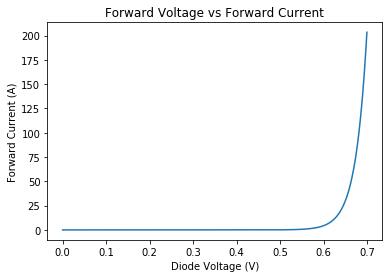

In [7]:
plt.plot(Diode_Data_x, Diode_Data_y)


#labels
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Forward Current (A)")

#title
plt.title("Forward Voltage vs Forward Current")


#show plot
plt.show()

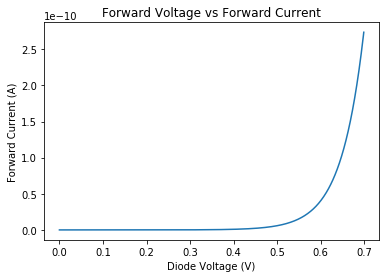

In [8]:
IS=1.0E-15 # Scale Current (LCL)
n=2 # Emission coefficient (UCL)
Diode_Data_x = []
Diode_Data_y = []


VD = min
while VD <= max:
     IF=IS*(exp(VD/(n*VT)-1))
     #print('{0:+06.4e}'.format(float(VD)),'{:+6.4e}'.format(float(IF)))
     Diode_Data_x.append(VD)
     Diode_Data_y.append(IF)
     VD += step

plt.plot(Diode_Data_x, Diode_Data_y)


#labels
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Forward Current (A)")

#title
plt.title("Forward Voltage vs Forward Current")

#show plot
plt.show()

We have been saying that $E_g$ is "the most important parameter in semiconductor physics."<br><br>Why is that?<br>  A lot of that importance has to do with the relationship,
$$\gamma={\left ( \frac{-E_g}{2kT} \right )}$$<br>
$$n_i=\sqrt{N_c \cdot N_v}\cdot e^\gamma$$

In [9]:
from scipy import sqrt

Diode_Energy_Data_x = []
Diode_Energy_Data_y = []

min=1.0
max=1.17
step=1.0E-3

T=300
k=8.617330350E-05 #in eV/K
NC=2.82E19 #Effective density of states for electrons in the conduction band at 300 K
NV=1.83E19 #Effective density of states for holes in the valence band at 300 K

Eg = min
#print(" Eg(eV)       ni(cm^-3)")
#print("-----------------------")
while Eg <= max:
         ni=sqrt(NC*NV)*exp(-Eg/(2*k*T))
         #print('{0:+06.4e}'.format(float(Eg)),'{:+6.4e}'.format(float(ni)))
         Diode_Energy_Data_x.append(Eg)
         Diode_Energy_Data_y.append(ni)
         Eg += step

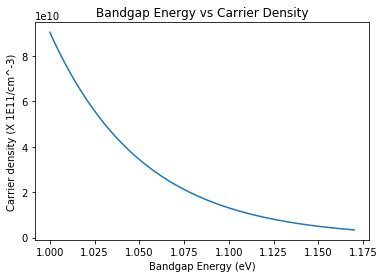

In [10]:
plt.plot(Diode_Energy_Data_x, Diode_Energy_Data_y)


#labels
plt.xlabel("Bandgap Energy (eV)")
plt.ylabel("Carrier density (X 1E11/cm^-3)")

#title
plt.title("Bandgap Energy vs Carrier Density")

#show plot
plt.show()

Finally ... Up until this point we have been saying that "there really are no so-called insulators - only poor conductors."  With the following few illustrations, we will transition away from this overly reductive model.

$E_G$ is the "bandgap energy."  This is the separation between the energy of the lowest conduction band and that of the highest valence band is called the "bandgap."  This is the most important parameter in semiconductor physics.  In the case of $Si$, the value of $E_G$ is $1.11eV$ at $300K$, and $1.16eV$ at $0K$.

Consider the energy bands of Conductors(Metal), Semiconductors(Si), and Insulators:

![Energy Bands Compared](Energy_Bands_Compared.JPG)

NB! $E_F$ is is the _Fermi (energy) level_, and can be considered to be a hypothetical energy level of an electron, such that at thermodynamic equilibrium this energy level would have a 50% probability of being occupied at any given time. 

Clearly, when viewed from this perspective, there are obviously classes of materials that have valence and conduction band overlap (conductors) and those that have a quite wide energy level bandgap (insulators).